In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1BiGZSedP4BIIuTbVTBodOhVgFImaz08c") #path to download live = uc?export=download
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
cat_vars = df.select_dtypes(include ='object')
cat_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [4]:
cat_vars.isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [5]:
miss_val_per = cat_vars.isnull().mean()*100
#Percentage of missing value
miss_val_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [6]:
drops_vars = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
cat_vars.drop(columns = drops_vars,axis = 1,inplace = True)
cat_vars.shape

(1460, 38)

In [7]:
isnull_per = cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per > 0].keys() #missing value
miss_vars

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [8]:
cat_vars['MasVnrType'].fillna('Missing') #fill the missing value

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [9]:
cat_vars['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [10]:
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0])

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [11]:
for var in miss_vars:     #fill the missing value with mode
  cat_vars[var].fillna(cat_vars[var].mode()[0],inplace = True)
  print("Value inplace of missing value =",cat_vars[var].mode()[0])

Value inplace of missing value = None
Value inplace of missing value = TA
Value inplace of missing value = TA
Value inplace of missing value = No
Value inplace of missing value = Unf
Value inplace of missing value = Unf
Value inplace of missing value = SBrkr
Value inplace of missing value = Attchd
Value inplace of missing value = Unf
Value inplace of missing value = TA
Value inplace of missing value = TA


In [12]:
cat_vars.isnull().sum() #No null value in data

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

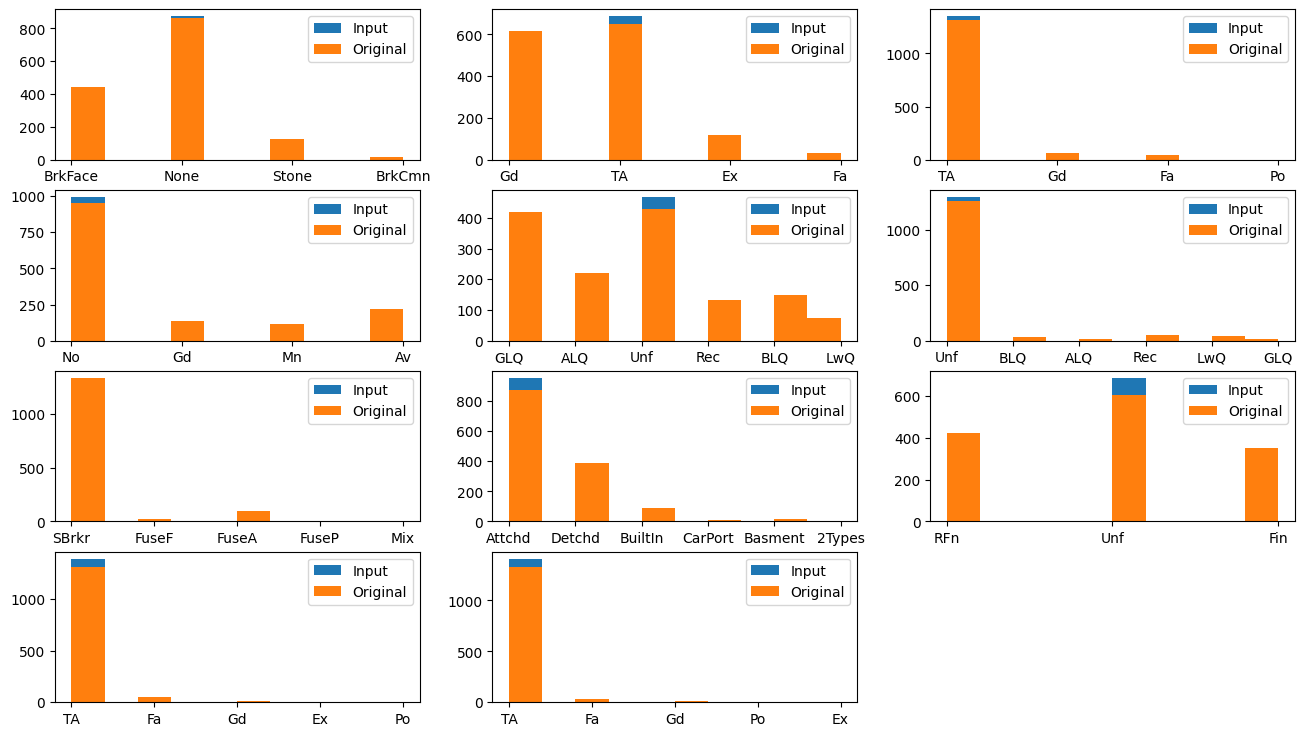

In [13]:
plt.figure(figsize = (16,9))
for i,var in enumerate(miss_vars):
  plt.subplot(4,3,i+1)
  plt.hist(cat_vars[var],label = "Input")
  plt.hist(df[var].dropna(),label = "Original")
  plt.legend()

In [14]:
df.update(cat_vars) #update in main data frame
df.drop(columns = drops_vars,inplace =True)

In [15]:
df.select_dtypes(include = "object").isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

#Using SCIKIT-LEARN Library

Simple Imputer

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
train = pd.read_csv("https://drive.google.com/uc?export=download&id=1BiGZSedP4BIIuTbVTBodOhVgFImaz08c") #path to download live = uc?export=download


In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
X_train = train.drop(columns ="SalePrice") #consider as matrix
y_train = train['SalePrice'] #consider as vector so small 'y'

#Numerical Missing Value Imputation

In [20]:
num_vars = X_train.select_dtypes(include =['int64','float64']).columns
num_vars

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [21]:
X_train[num_vars].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [22]:
imputer_mean = SimpleImputer(strategy = 'mean') #apply strategy using simpleimputer

In [23]:
imputer_mean.fit(X_train[num_vars]) #give blueprint of missing value

SimpleImputer()

In [24]:
imputer_mean.statistics_ #give mean vlaue of every variable

array([7.30500000e+02, 5.68972603e+01, 7.00499584e+01, 1.05168281e+04,
       6.09931507e+00, 5.57534247e+00, 1.97126781e+03, 1.98486575e+03,
       1.03685262e+02, 4.43639726e+02, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 1.16262671e+03, 3.46992466e+02, 5.84452055e+00,
       1.51546370e+03, 4.25342466e-01, 5.75342466e-02, 1.56506849e+00,
       3.82876712e-01, 2.86643836e+00, 1.04657534e+00, 6.51780822e+00,
       6.13013699e-01, 1.97850616e+03, 1.76712329e+00, 4.72980137e+02,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 4.34890411e+01, 6.32191781e+00,
       2.00781575e+03])

In [25]:
imputer_mean.transform(X_train[num_vars]) #return vlaue of mean of column having num_var

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [26]:
X_train[num_vars] = imputer_mean.transform(X_train[num_vars])
X_train[num_vars].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [27]:
#imputer_mean = SimpleImputer(strategy = 'constant',fill_value = 99) -> fill 99 in place of missing value

#Categorical Missing Value Imputation

In [28]:
cat_vars = X_train.select_dtypes(include =['O']).columns
cat_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
X_train[num_vars].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [30]:
imputer_mode = SimpleImputer(strategy = 'most_frequent')
imputer_mode

SimpleImputer(strategy='most_frequent')

In [31]:
imputer_mode.fit(X_train[cat_vars])

SimpleImputer(strategy='most_frequent')

In [32]:
imputer_mode.statistics_

array(['RL', 'Pave', 'Grvl', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl',
       'NAmes', 'Norm', 'Norm', '1Fam', '1Story', 'Gable', 'CompShg',
       'VinylSd', 'VinylSd', 'None', 'TA', 'TA', 'PConc', 'TA', 'TA',
       'No', 'Unf', 'Unf', 'GasA', 'Ex', 'Y', 'SBrkr', 'TA', 'Typ', 'Gd',
       'Attchd', 'Unf', 'TA', 'TA', 'Y', 'Gd', 'MnPrv', 'Shed', 'WD',
       'Normal'], dtype=object)

In [33]:
X_train[cat_vars] = imputer_mode.transform(X_train[cat_vars])
X_train[cat_vars].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [34]:
X_train.isnull().sum().sum() #All dataset is clean there is no null value

0

#Apply Different stragey for different variable using

>simpleImputer

>Pipeline

>ColumnTransformer

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
train = pd.read_csv("https://drive.google.com/uc?export=download&id=1BiGZSedP4BIIuTbVTBodOhVgFImaz08c") #path to download live = uc?export=download
train.shape

(1460, 81)

In [37]:
X_train = train.drop(columns = "SalePrice",axis = 1)
y_train = train["SalePrice"]
print("Shape of X_train",X_train.shape)
print("Shape of y_train shape ",y_train.shape)

Shape of X_train (1460, 80)
Shape of y_train shape  (1460,)


#Missing value imputation

In [38]:
isnull_sum = X_train.isnull().sum()
isnull_sum

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [39]:
num_vars = X_train.select_dtypes(include =['int64','float64']).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

In [40]:
num_vars_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [41]:
cat_vars = X_train.select_dtypes(include =['O']).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]
cat_vars_miss

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#Pipeline

>Operation in sequence

In [79]:
num_var_mean = ['LotFrontage']
num_var_median = ['MasVnrArea', 'GarageYrBlt']
cat_vars_mode = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                  'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu']
cat_vars_missing = ['GarageType','GarageFinish','GarageQual','GarageCond',
                    'PoolQC','Fence','MiscFeature']



In [53]:
num_var_mean_imputer = Pipeline(steps = [("imputer",SimpleImputer(strategy = "mean"))])
num_var_median_imputer = Pipeline(steps = [("imputer",SimpleImputer(strategy = "median"))])
cat_vars_mode_imputer = Pipeline(steps = [("imputer",SimpleImputer(strategy = "most_frequent"))])
cat_vars_missing_imputer = Pipeline(steps = [("imputer",SimpleImputer(strategy = "constant",fill_value = "missing"))])

In [54]:
preprocessor = ColumnTransformer(transformers= [("mean_imputer",num_var_mean_imputer,num_var_mean),
                                  ("median_imputer",num_var_median_imputer,num_var_median),
                                  ("mode_imputer",cat_vars_mode_imputer,cat_vars_missing)])

In [56]:
preprocessor.fit(X_train) #impelement the strategy

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['GarageType', 'GarageFinish', 'GarageQual',
                                  'GarageCond', 'PoolQC', 'Fence',
                                  'MiscFeature'])])

In [60]:
print(preprocessor.transform) #show data

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['GarageType', 'GarageFinish', 'GarageQual',
                                  'GarageCond', 'PoolQC', 'Fence',
                                  'MiscFeature'])])>


In [64]:
#fit method give value according to strategy
preprocessor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_ #name mention above

array([70.04995837])

In [65]:
train['LotFrontage'].mean() #same value given by the fit

70.04995836802665

In [66]:
preprocessor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_ #name mention above

array(['Attchd', 'Unf', 'TA', 'TA', 'Gd', 'MnPrv', 'Shed'], dtype=object)

In [68]:
#transform to main data set
X_train_clean = preprocessor.transform(X_train)


In [70]:
X_train_clean #two dimensional array

array([[65.0, 196.0, 2003.0, ..., 'Gd', 'MnPrv', 'Shed'],
       [80.0, 0.0, 1976.0, ..., 'Gd', 'MnPrv', 'Shed'],
       [68.0, 162.0, 2001.0, ..., 'Gd', 'MnPrv', 'Shed'],
       ...,
       [66.0, 0.0, 1941.0, ..., 'Gd', 'GdPrv', 'Shed'],
       [68.0, 0.0, 1950.0, ..., 'Gd', 'MnPrv', 'Shed'],
       [75.0, 0.0, 1965.0, ..., 'Gd', 'MnPrv', 'Shed']], dtype=object)

In [74]:
preprocessor.transformers_ #column index drop where missing value is not present
#by default drop if you not want drop then pass argument passthrough

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['LotFrontage']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['MasVnrArea', 'GarageYrBlt']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['GarageType',
   'GarageFinish',
   'GarageQual',
   'GarageCond',
   'PoolQC',
   'Fence',
   'MiscFeature']),
 ('remainder',
  'drop',
  [0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   61,
   62,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   75,
   76,
   77,
   78,
   79])]

In [81]:
X_train_clean_miss_var = pd.DataFrame(X_train_clean ,columns=num_var_mean+num_var_median+cat_vars_mode+cat_vars_missing) #columns according to sequence mention above

ValueError: Shape of passed values is (1460, 10), indices imply (1460, 19)

In [82]:
train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64